In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import minimize
import pandas as pd
import numpy.linalg as LA

# CHEM 277B: Homework 2 - Simulated Annealing #

## 1. Classical simulated annealing

We will use the Schwefel function for D=10 in order to find its global minimum using CSA.

$ 𝑓(𝑥_1,𝑥_2...𝑥_𝐷)=418.9829xD - \sum_{i}^{D}x_i(sin(\sqrt(x_i))$

$  𝑥𝑖 ∈[−500,500]$ for $ 𝑖 =1,...,𝐷 $

In which we use the visitation function of a random displacement along each 
dimension

$  𝑥_𝑖 =𝑥_𝑖 +(2∗𝑈𝑅𝑁−1)×∆$, with $∆=0.5$ for $𝑖 =1,...,𝐷 $

#### (a) Fill  in  the  blanks  in  the  provided  simulated  annealing  code.  Use  a  linear  (Tt+1=Tt-α)  cooling  schedule with α=0.5, and initializing TSA=3000K, to perform CSA until the temperature reaches 30K and 10K,  and  record  the  function  values.  How  long  is  your  cooling  schedule?  Check  against  the  debugging outputs. Given the stochastic nature of CSA, it would be best to report at least 3 runs for each lower bound temperature. Do you find better solutions when cooling to the lower temperature? ####

In [2]:
def SA(solution,evaluation,delta,boundary,cooling_schedule):
    """ Simulated Annealing for minimization
    solution: np.array. Initial guess of solution
    evaluation: func. Function to evaluate solution
    delta: float. Magnitude of random displacement
    boundary: array of int/float. [lowerbound,upperbound]
    cooling_schedule: np.array. An array of tempretures for simulated annealing
    """
    best_solution=solution.copy() 
    lowest_eval=evaluation(best_solution) 
    for idx,temp in enumerate(cooling_schedule): 
        if idx%500==0: 
            print("%d/%d   temp:%f"%(idx,len(cooling_schedule),temp))
        for n in range(len(solution)): 
            trial=solution.copy() 
            trial[n]+=delta*(2*np.random.random()-1) 
            if trial[n]>=boundary[0] and trial[n]<=boundary[1]:  
                #fill in acceptance criterion
                if np.exp((evaluation(solution)-evaluation(trial))/temp)>np.random.random(): 
                    solution=trial # update solution
                    if evaluation(solution)<lowest_eval: 
                        #update solution here
                        best_solution=solution.copy() 
                        lowest_eval=evaluation(solution) 
                        
    return {"solution":best_solution,"evaluation":lowest_eval}

In [3]:
def Schwefel(x):
    """ Schwefel function
    x: np.array. Input of function
    """
    return 418.9829*len(x) - np.sum(x*np.sin(np.sqrt(np.abs(x))))

Linear Cooling: 

In [4]:
linear_cooling_30 = np.arange(3000, 30, -0.5)
linear_cooling_10 = np.arange(3000, 10, -0.5)
len(linear_cooling_10)

5980

From 3000K to 30K, the cooling schedule is 5940 values long while there are 5980 values from 3000K to 10K.

In [5]:
solution=np.random.random(10)*1000-500 # random initial guess within [-500,500]
SA(solution, Schwefel, 0.5, [-500, 500], linear_cooling_30)

0/5940   temp:3000.000000
500/5940   temp:2750.000000
1000/5940   temp:2500.000000
1500/5940   temp:2250.000000
2000/5940   temp:2000.000000
2500/5940   temp:1750.000000
3000/5940   temp:1500.000000
3500/5940   temp:1250.000000
4000/5940   temp:1000.000000
4500/5940   temp:750.000000
5000/5940   temp:500.000000
5500/5940   temp:250.000000


{'solution': array([ 354.34830077,  122.60772378,  277.0726529 ,  -61.48717164,
         485.61918847,  457.37145607,  478.75549242,  102.1477102 ,
        -312.12318192,  123.63384761]),
 'evaluation': 4213.270378200246}

In [6]:
SA(solution, Schwefel, 0.5, [-500, 500], linear_cooling_30)

0/5940   temp:3000.000000
500/5940   temp:2750.000000
1000/5940   temp:2500.000000
1500/5940   temp:2250.000000
2000/5940   temp:2000.000000
2500/5940   temp:1750.000000
3000/5940   temp:1500.000000
3500/5940   temp:1250.000000
4000/5940   temp:1000.000000
4500/5940   temp:750.000000
5000/5940   temp:500.000000
5500/5940   temp:250.000000


{'solution': array([ 401.71641868,  164.56878307,  231.5630438 ,  -68.09819663,
         443.5855947 ,  466.41215665,  471.71291695,   90.00395032,
        -341.6347264 ,  162.88991274]),
 'evaluation': 2917.257285435508}

In [7]:
SA(solution, Schwefel, 0.5, [-500, 500], linear_cooling_30)

0/5940   temp:3000.000000
500/5940   temp:2750.000000
1000/5940   temp:2500.000000
1500/5940   temp:2250.000000
2000/5940   temp:2000.000000
2500/5940   temp:1750.000000
3000/5940   temp:1500.000000
3500/5940   temp:1250.000000
4000/5940   temp:1000.000000
4500/5940   temp:750.000000
5000/5940   temp:500.000000
5500/5940   temp:250.000000


{'solution': array([ 381.88606487,  101.33162264,  329.53514814, -114.14393288,
         455.25686673,  492.3784694 ,  449.73739444,  108.93983112,
        -339.78981115,  102.03099027]),
 'evaluation': 3630.7117380115196}

In [8]:
SA(solution, Schwefel, 0.5, [-500,500], linear_cooling_10)

0/5980   temp:3000.000000
500/5980   temp:2750.000000
1000/5980   temp:2500.000000
1500/5980   temp:2250.000000
2000/5980   temp:2000.000000
2500/5980   temp:1750.000000
3000/5980   temp:1500.000000
3500/5980   temp:1250.000000
4000/5980   temp:1000.000000
4500/5980   temp:750.000000
5000/5980   temp:500.000000
5500/5980   temp:250.000000


{'solution': array([ 361.19165315,  133.36754819,  248.5700017 ,  -75.0598453 ,
         468.86427649,  431.28376656,  481.57210993,  107.76019298,
        -326.64073332,  146.86318545]),
 'evaluation': 3652.998170562566}

In [9]:
SA(solution, Schwefel, 0.5, [-500,500], linear_cooling_10)

0/5980   temp:3000.000000
500/5980   temp:2750.000000
1000/5980   temp:2500.000000
1500/5980   temp:2250.000000
2000/5980   temp:2000.000000
2500/5980   temp:1750.000000
3000/5980   temp:1500.000000
3500/5980   temp:1250.000000
4000/5980   temp:1000.000000
4500/5980   temp:750.000000
5000/5980   temp:500.000000
5500/5980   temp:250.000000


{'solution': array([ 307.84810871,  157.53480634,  293.26491182,  -80.91603304,
         464.65875438,  429.94460226,  485.34114939,   94.29730415,
        -294.01641039,  142.07395508]),
 'evaluation': 4047.7656017620893}

In [10]:
SA(solution, Schwefel, 0.5, [-500,500], linear_cooling_10)

0/5980   temp:3000.000000
500/5980   temp:2750.000000
1000/5980   temp:2500.000000
1500/5980   temp:2250.000000
2000/5980   temp:2000.000000
2500/5980   temp:1750.000000
3000/5980   temp:1500.000000
3500/5980   temp:1250.000000
4000/5980   temp:1000.000000
4500/5980   temp:750.000000
5000/5980   temp:500.000000
5500/5980   temp:250.000000


{'solution': array([ 389.20541949,  190.14426673,  324.89450119,  -83.43963269,
         486.44567534,  461.96876976,  453.42875661,  124.34017421,
        -294.68806422,  106.99699303]),
 'evaluation': 3408.551354259809}

Better solutions were not found when cooling to 10K compared to 30K. 

#### (b) Choose logarithmic cooling $T_{k}=T_{SA}/(1+ T_{SA} log(1+k)/3 \sigma_{curr})$, where k is counter for number of cooling cycle) and $\sigma_{curr}$ is an adjustable parameter,  with two initial temperature TSA = 3000K and 6000K. Use $\sigma_{curr}$ = 1000 and k = 6000. Reconsider questions (a). Do these cooling schedules converge better than linear cooling? #### 

In [11]:
log_cooling_3000 = 3000 / (1 + (3000 * np.log(1 + np.arange(6000)) / (3 * 1000)))
log_cooling_6000 = 6000 / (1 + (6000 * np.log(1 + np.arange(6000)) / (3 * 1000)))

In [12]:
SA(solution,Schwefel,0.5,[-500,500],log_cooling_3000)

0/6000   temp:3000.000000
500/6000   temp:415.707877
1000/6000   temp:379.326466
1500/6000   temp:360.842054
2000/6000   temp:348.780336
2500/6000   temp:339.964687
3000/6000   temp:333.085339
3500/6000   temp:327.482176
4000/6000   temp:322.778491
4500/6000   temp:318.740173
5000/6000   temp:315.212364
5500/6000   temp:312.087616


{'solution': array([ 379.1015592 ,  115.44783205,  274.53656201,  -45.56012239,
         479.40291051,  452.22696977,  481.74963711,   85.16184562,
        -318.56498459,  124.65236057]),
 'evaluation': 3781.4841668854624}

In [13]:
SA(solution,Schwefel,0.5,[-500,500],log_cooling_3000)

0/6000   temp:3000.000000
500/6000   temp:415.707877
1000/6000   temp:379.326466
1500/6000   temp:360.842054
2000/6000   temp:348.780336
2500/6000   temp:339.964687
3000/6000   temp:333.085339
3500/6000   temp:327.482176
4000/6000   temp:322.778491
4500/6000   temp:318.740173
5000/6000   temp:315.212364
5500/6000   temp:312.087616


{'solution': array([ 389.43726023,  116.59174003,  259.32891901,  -87.7479204 ,
         468.38962495,  450.84640655,  485.27501905,  135.69511591,
        -317.29057803,  104.85457871]),
 'evaluation': 3567.0864927743355}

In [14]:
SA(solution,Schwefel,0.5,[-500,500],log_cooling_3000)

0/6000   temp:3000.000000
500/6000   temp:415.707877
1000/6000   temp:379.326466
1500/6000   temp:360.842054
2000/6000   temp:348.780336
2500/6000   temp:339.964687
3000/6000   temp:333.085339
3500/6000   temp:327.482176
4000/6000   temp:322.778491
4500/6000   temp:318.740173
5000/6000   temp:315.212364
5500/6000   temp:312.087616


{'solution': array([ 360.94981628,  103.68811437,  268.07967638,  -88.34457881,
         467.30476988,  430.22674341,  482.81346011,  152.46068373,
        -262.91879107,  109.06679009]),
 'evaluation': 3785.9323380572278}

In [15]:
SA(solution,Schwefel,0.5,[-500,500],log_cooling_6000)

0/6000   temp:6000.000000
500/6000   temp:446.654152
1000/6000   temp:404.926346
1500/6000   temp:383.931847
2000/6000   temp:370.306260
2500/6000   temp:360.384346
3000/6000   temp:352.663160
3500/6000   temp:346.388168
4000/6000   temp:341.130065
4500/6000   temp:336.622703
5000/6000   temp:332.690384
5500/6000   temp:329.211417


{'solution': array([ 370.43842189,  130.36702821,  242.20792868,  -41.17264237,
         482.23706775,  458.11128742,  459.30151423,   77.67910917,
        -330.79978187,  119.69864245]),
 'evaluation': 3494.6826094294574}

In [16]:
SA(solution,Schwefel,0.5,[-500,500],log_cooling_6000)

0/6000   temp:6000.000000
500/6000   temp:446.654152
1000/6000   temp:404.926346
1500/6000   temp:383.931847
2000/6000   temp:370.306260
2500/6000   temp:360.384346
3000/6000   temp:352.663160
3500/6000   temp:346.388168
4000/6000   temp:341.130065
4500/6000   temp:336.622703
5000/6000   temp:332.690384
5500/6000   temp:329.211417


{'solution': array([ 376.37810962,  137.27899452,  300.47725337,  -58.65430562,
         488.62636205,  434.83466609,  465.07031517,   88.34458406,
        -308.27743653,  165.27829686]),
 'evaluation': 3576.2470556493067}

In [17]:
SA(solution,Schwefel,0.5,[-500,500],log_cooling_6000)

0/6000   temp:6000.000000
500/6000   temp:446.654152
1000/6000   temp:404.926346
1500/6000   temp:383.931847
2000/6000   temp:370.306260
2500/6000   temp:360.384346
3000/6000   temp:352.663160
3500/6000   temp:346.388168
4000/6000   temp:341.130065
4500/6000   temp:336.622703
5000/6000   temp:332.690384
5500/6000   temp:329.211417


{'solution': array([ 377.58719172,  143.22565626,  295.33079413,  -56.34500951,
         449.42747435,  456.50305452,  470.0949483 ,   99.17322524,
        -300.77828465,  159.6908259 ]),
 'evaluation': 3418.975384466998}

The logarithmic cooling schedules do not appear to cause the simulated annealing function to converge better than the linear cooling schedules. The logarthimic cooling schedules lead to evaluations that are more consistent compared to the linear cooling schedules, but the simulated annealing algorithm is converging to local minima. 

#### (c) Create your own annealing schedule (cooling and heating cycles) to see if you can find better solutions. Use a local optimization technique on your CSA answer, can you find even better solution? ####

In [18]:
schedule = np.append(linear_cooling_10, np.linspace(linear_cooling_10[-1], 2000, 200))
schedule = np.append(schedule, np.linspace(schedule[-1], 100, 2000))
schedule=np.append(schedule,np.linspace(schedule[-1],3000,400))
schedule=np.append(schedule,np.linspace(schedule[-1],50,5000))
schedule=np.append(schedule,np.linspace(schedule[-1],2500,200))
schedule=np.append(schedule,np.linspace(schedule[-1],5,3000))

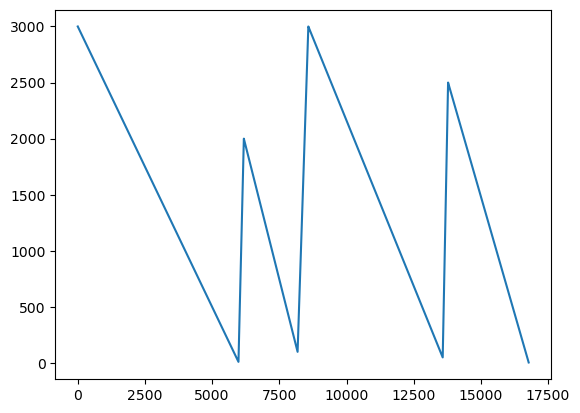

In [19]:
plt.plot(schedule);

In [20]:
SA(solution,Schwefel,0.5,[-500,500],schedule)

0/16780   temp:3000.000000
500/16780   temp:2750.000000
1000/16780   temp:2500.000000
1500/16780   temp:2250.000000
2000/16780   temp:2000.000000
2500/16780   temp:1750.000000
3000/16780   temp:1500.000000
3500/16780   temp:1250.000000
4000/16780   temp:1000.000000
4500/16780   temp:750.000000
5000/16780   temp:500.000000
5500/16780   temp:250.000000
6000/16780   temp:210.449749
6500/16780   temp:1695.847924
7000/16780   temp:1220.610305
7500/16780   temp:745.372686
8000/16780   temp:270.135068
8500/16780   temp:2425.814536
9000/16780   temp:2752.150430
9500/16780   temp:2457.091418
10000/16780   temp:2162.032406
10500/16780   temp:1866.973395
11000/16780   temp:1571.914383
11500/16780   temp:1276.855371
12000/16780   temp:981.796359
12500/16780   temp:686.737347
13000/16780   temp:391.678336
13500/16780   temp:96.619324
14000/16780   temp:2316.972324
14500/16780   temp:1901.000333
15000/16780   temp:1485.028343
15500/16780   temp:1069.056352
16000/16780   temp:653.084361
16500/16780  

{'solution': array([ 314.20956619,   95.29308966,  213.49229391, -124.39242095,
         469.66204411,  395.72493141,  485.74829094,  141.16119393,
        -309.67848787,  133.43976414]),
 'evaluation': 3634.6212542466533}

In [21]:
CSA_solution = SA(solution,Schwefel,0.5,[-500,500],schedule)
minimize(Schwefel, CSA_solution['solution'], method='BFGS', options={'disp': True, 'gtol': 1e-5})

0/16780   temp:3000.000000
500/16780   temp:2750.000000
1000/16780   temp:2500.000000
1500/16780   temp:2250.000000
2000/16780   temp:2000.000000
2500/16780   temp:1750.000000
3000/16780   temp:1500.000000
3500/16780   temp:1250.000000
4000/16780   temp:1000.000000
4500/16780   temp:750.000000
5000/16780   temp:500.000000
5500/16780   temp:250.000000
6000/16780   temp:210.449749
6500/16780   temp:1695.847924
7000/16780   temp:1220.610305
7500/16780   temp:745.372686
8000/16780   temp:270.135068
8500/16780   temp:2425.814536
9000/16780   temp:2752.150430
9500/16780   temp:2457.091418
10000/16780   temp:2162.032406
10500/16780   temp:1866.973395
11000/16780   temp:1571.914383
11500/16780   temp:1276.855371
12000/16780   temp:981.796359
12500/16780   temp:686.737347
13000/16780   temp:391.678336
13500/16780   temp:96.619324
14000/16780   temp:2316.972324
14500/16780   temp:1901.000333
15000/16780   temp:1485.028343
15500/16780   temp:1069.056352
16000/16780   temp:653.084361
16500/16780  

      fun: 1480.5532807043842
 hess_inv: array([[ 3.24775068,  0.06473292, -0.3736656 ,  0.51925797, -0.09511262,
         0.14928773,  0.27953726, -0.5329714 , -0.04047756,  0.14162224],
       [ 0.06473292,  3.48451783, -0.0627705 ,  0.10110864, -0.04795578,
        -0.07882364, -0.05085892, -0.01829774, -0.01247571,  0.08866062],
       [-0.3736656 , -0.0627705 ,  1.51795169, -0.29406192,  0.22109379,
         0.07832732,  0.15303898,  0.20095444,  0.15853608,  0.79510208],
       [ 0.51925797,  0.10110864, -0.29406192,  1.22293848, -0.11495521,
         0.00477374, -0.02795767, -0.17310746, -0.07386705, -0.3128268 ],
       [-0.09511262, -0.04795578,  0.22109379, -0.11495521,  1.56928742,
         0.08007354,  0.56360761,  0.21909226,  0.10145606, -0.36538809],
       [ 0.14928773, -0.07882364,  0.07832732,  0.00477374,  0.08007354,
         0.93028744,  0.10682839,  0.02975821,  0.05006236,  0.06129292],
       [ 0.27953726, -0.05085892,  0.15303898, -0.02795767,  0.56360761,
    

A better solution was not necessarily found by using my own annealing schedule of cooling and heating cycles. However, using the solution calculated by my SA function, scipy's BFGS function was able to converge to a better local minimum that evaluates between 1000-2000 in comparison to simulated annealing's solution evaluation of ~3000-4000. 

## 2. Clustering and Simulated Annealing ##

Clustering is a widely used technique in exploratory data 
analysis that we will examine later using unsupervised learning for classification of objects into groups. But 
for now we will consider a popular meta-heuristic for solving it using CSA. In this case we would like to 
cluster N data points into K clusters by solving the minimization of the following cost function:  

$$ J(N, K)= \sum_{i=1}^{N} \sum_{j=1}^{K} w_{ij}d_{ij}^2 $$

$$ w_{ij} = 
\begin{cases}
      1 & \text{if point i is assigned to cluster j}\\
      0 & \text{otherwise}\\
    \end{cases}        , 1 \leq i \leq N and 1 \leq j \leq K $$

where 𝑑𝑖𝑗 is the Euclidean distance between point 𝑖 and the center of cluster 𝑗, and condition on 𝑤𝑖𝑗 ensures 
that a point is defined to be in one of the distinct clusters 𝐾.  

In this  problem  you  are  given  a  data  set  of 𝑁 =178  wines,  all 
grown  in  the  same  region  in  Italy,  but  derived  from  𝐾=3  different 
cultivars. You can find this dataset on BCourse -> Files -> Datasets -> 
wines.csv. A chemical analysis was used to determine the quantities of 
13  chemical  constituents  found  in  each  of  the  wines,  and  our  job  is  to 
classify each wine into one of the three different cultivars based on those 
chemical descriptors. Use CSA to determine the most optimal clustering 
of the 178 wines into their most likely cultivar, given the following specifications 

#### (a) Normalize your chemical descriptor data for each attribute by subtracting off the mean and dividing by the standard deviation. ####

In [22]:
df = pd.read_csv('wines.csv')
wine_features = df.drop(['Start assignment', 'ranking'], axis=1)
wine_features

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
2,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
3,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
4,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
176,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560


In [23]:
normalized_features = (wine_features - wine_features.mean()) / wine_features.std()
normalized_features

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
2,2.253415,-0.623328,-0.716315,-1.645408,-0.191954,0.806722,0.951817,-0.577356,0.679820,0.061213,0.536158,0.335659,0.946649
3,1.378844,-0.766550,-0.169557,-0.806975,-0.331985,-0.151973,0.401188,-0.818411,-0.036514,-0.025057,0.929908,0.293405,1.692900
4,0.923081,-0.542765,0.158499,-1.046527,-0.752080,0.487157,0.731565,-0.577356,0.382804,0.233755,0.842408,0.406082,1.819921
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.491955,2.026281,1.798775,1.648436,0.858284,-0.503494,-1.070491,-0.738059,-0.840205,1.484679,-1.257591,-0.974218,-0.371199
174,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
175,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664
176,1.391162,1.578712,1.361368,1.498716,-0.261969,-0.391646,-1.270720,1.592131,-0.420888,1.786626,-1.520090,-1.424928,-0.593486


#### (b) Given the initial categorization of the 178 wines into the 3 clusters according to Start assignment column in the dataset, determine the centroid of each of the three clusters. The centroid for this problem is a 13-D vector where each entry is the mean of a variable for the observations in that cluster.  ####

In [24]:
centroid = []
for i in range(1, 4):
    centroid.append(normalized_features[df['Start assignment'] == i].mean())
centroid = np.array(centroid)
centroid

array([[-0.02624653, -0.02281371,  0.03909152, -0.01139289,  0.00119361,
         0.04610228, -0.01445858, -0.09247727,  0.01529861, -0.12233484,
         0.07195608, -0.02107247, -0.00108455],
       [-0.03019892, -0.04315704, -0.11766091, -0.12232231, -0.18008643,
        -0.1099961 , -0.04033264,  0.03549325, -0.14667323, -0.2178502 ,
         0.08456967,  0.07759861, -0.08523904],
       [ 0.05416451,  0.06343378,  0.07663419,  0.12914432,  0.17304706,
         0.06255472,  0.05275776,  0.05359967,  0.12731805,  0.32702594,
        -0.15021415, -0.05501827,  0.08347553]])

#### (c) Given the centroid, determine the value of the cost function for this initial categorization. Check against the debugging output. ####

$$ J(N, K)= \sum_{i=1}^{N} \sum_{j=1}^{K} w_{ij}d_{ij}^2 $$

$$ w_{ij} = 
\begin{cases}
      1 & \text{if point i is assigned to cluster j}\\
      0 & \text{otherwise}\\
    \end{cases}        , 1 \leq i \leq N and 1 \leq j \leq K $$

In [25]:
def cost_function(centroid, normalized_features, ranks):
    cost = 0
    for i in range(len(normalized_features)):
        if ranks[i] == 1:
            cost += np.sum((normalized_features.iloc[i] - centroid[0]) ** 2)
        elif ranks[i] == 2:
            cost += np.sum((normalized_features.iloc[i] - centroid[1]) ** 2)
        elif ranks[i] == 3:
            cost += np.sum((normalized_features.iloc[i] - centroid[2]) ** 2)
    return cost

In [26]:
cost_function(centroid, normalized_features, df['Start assignment'])

2275.34927819508

#### (d) Fill in the blanks in the provided simulated annealing code. Use CSA with a visitation function in which a randomly chosen wine 𝑖 is moved from its present cluster 𝑗 to another randomly chosen cluster 𝑘 ≠𝑗. One epoch corresponds to attempting to move all 𝑁 wines between clusters, i.e. there are 𝑁 Metropolis steps, at each temperature. Use a start temperature of 500, and use a geometric cooling schedule(Tt+1=αTt)  with  α=0.999  and  total  of  5000  steps,  again  using  at  least  3  runs  of  CSA.  Check  your  final  temperature against  debugging  output.  Report  all  3  solutions  and  the  wine  members  as  part  of  each  cluster.  Validate your result using the provided code. How well is the assignment? ####

In [27]:
def simulated_annealing(feats, ranks, centers, start_temp, alpha, steps=5000):
    """Simulated annealing algorithm for clustering.
    feats: pd.DataFrame, normalized features of wines
    ranks: np.array shape(178,), initial assignment of wines to clusters
    centers: np.array shape(3, 13), fixed centers of clusters
    start_temp: float, initial temperature
    alpha: float, hyperparameter for geometric cooling
    steps: int, number of steps to run
    """
    # initialize variables
    temp = start_temp
    best_rank = ranks.copy()
    lowest_cost = cost_function(centers, feats, best_rank)
    for step in (range(steps)):
        temp *= alpha
        if step % 500 == 0:
            print(f'step: {step}, temp: {temp}, cost: {lowest_cost}')
        for n in range(len(ranks)):
            trial = ranks.copy()
            rand_choice = np.random.randint(3)+1
            trial[n] = rand_choice
            # Metropolis acceptance criterion
            if np.exp(-(lowest_cost - cost_function(centers, feats, trial))/temp) > np.random.random():
                ranks = trial
                new_eval = cost_function(centers, feats, ranks)
                if new_eval < lowest_cost:
                    lowest_cost = new_eval
                    best_rank = ranks.copy()

    return best_rank, lowest_cost


#### (e) Adapt  your  code  in  2(d).  Now  use  CSA  with  a  visitation  function  in  which  a  randomly  chosen centroid 𝑗 is updated as a random walk for each of its 13 components  ####

In [28]:
def simulated_annealing_edit(feats, ranks, centers, start_temp, alpha, delta, steps=5000):
    """Simulated annealing algorithm for clustering.
    feats: pd.DataFrame, normalized features of wines
    ranks: np.array shape(178,), initial assignment of wines to clusters
    centers: np.array shape(3, 13), fixed centers of clusters
    start_temp: float, initial temperature
    alpha: float, hyperparameter for geometric cooling
    steps: int, number of steps to run
    """
    # initialize variables
    temp = start_temp
    best_rank = ranks.copy()
    lowest_cost = cost_function(centers, feats, best_rank)
    for step in (range(steps)):
        temp *= alpha
        if step % 500 == 0:
            print(f'step: {step}, temp: {temp}, cost: {lowest_cost}')
        for n in range(len(centers)):
            trial = centers.copy()
            trial[n]+=delta*(2*np.random.random()-1) 
            # Metropolis acceptance criterion
            if np.exp((lowest_cost - cost_function(trial, feats, ranks)) / temp) > np.random.rand():
                centers = trial
                if cost_function(centers, feats, ranks) < lowest_cost:
                    lowest_cost = cost_function(centers, feats, ranks)
                    best_rank = ranks.copy()

    return best_rank, lowest_cost

In [ ]:
simulated_annealing(normalized_features, df['Start assignment'], centroid, 500, 0.999)